In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.rdf import InterRDF
import MDAnalysis as mda

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Step, Time, Kin,Temp,Pot,ConsQty,UsedTime = np.loadtxt('water_aimd_1ns_every0.5fs-1.ener', skiprows=1, unpack=True)

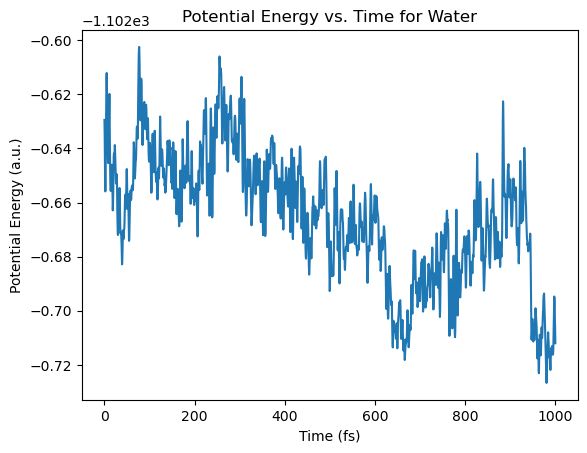

In [3]:
plt.plot(Time, Pot)
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs. Time for Water')

plt.show()

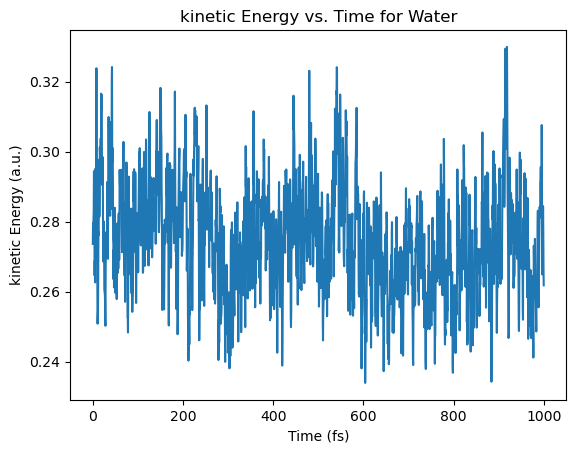

In [4]:
plt.plot(Time, Kin)
plt.xlabel('Time (fs)')
plt.ylabel('kinetic Energy (a.u.)')
plt.title('kinetic Energy vs. Time for Water')
plt.show()

In [5]:
traj = mda.Universe('water_aimd_1ns_every0.5fs-pos-1.xyz')
traj

traj.dimensions = np.array([12.42, 12.42, 12.42, 90, 90, 90])

In [6]:
box_size = 12.42
rdf = InterRDF(traj.select_atoms('name O'), traj.select_atoms('name O'), range=(0.0, box_size / 2), nbins=100)
rdf.run()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


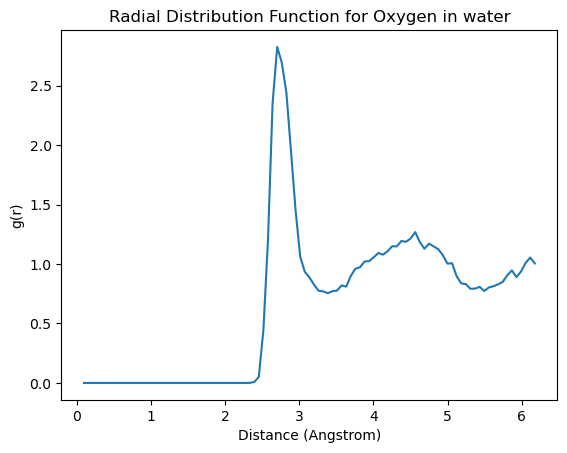

In [7]:
plt.plot(rdf.bins[1:], rdf.rdf[1:])

plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for Oxygen in water')

plt.show()